In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from classification import Classifier
import preprocessing


In [2]:
import preprocessing
dataset_path = "../data/mfeat-pix"
samples_per_class = 200
np.random.seed(42)



img_shape = (16, 15)

data = preprocessing.load_data(dataset_path)
data_labels = np.repeat(np.arange(10), samples_per_class) #only possible as the data strucutre is known

print(f'data shape: {data.shape}')
print(f'data lable shape: {data_labels.shape}')

data shape: (2000, 240)
data lable shape: (2000,)


In [7]:
#initizlize the classification training class
hidden_architecture = [10, 50, 10]


loss = 'cross_entropy' 
loss_params = {'lambda_lasso': 0.0, 'lambda_ridge': 0.0}

optimizer = 'gd' 
optimizer_params = {'alpha': 0.001}


model = Classifier(data, data_labels, hidden_architecture, seed= 42)
model.data_prep(test_split_coef = 0.8, standardization = True) #if validiation coeff is zero, then no hyperparam tuning
params, history = model.train(loss = loss, loss_params = loss_params, optimizer = optimizer, optimizer_params = optimizer_params, 
                              batch_size = 25, epochs = 50, epoch_rate = 10)


model_2 = Classifier(data, data_labels, hidden_architecture, seed= 42)
model_2.data_prep(test_split_coef = 0.8, standardization = True) #if validiation coeff is zero, then no hyperparam tuning
params, history_2 = model_2.train(loss = loss, loss_params = loss_params, optimizer = optimizer, optimizer_params = optimizer_params, 
                              batch_size = 50, epochs = 50, epoch_rate = 10)

Epoch 10
Train Loss: 1.9170 |Train Accuracy: 0.4400
Test Loss: 1.9024 |Test Accuracy: 0.3750
--------------------------------------------------------------------
Epoch 20
Train Loss: 1.6711 |Train Accuracy: 0.6112
Test Loss: 1.3891 |Test Accuracy: 0.5425
--------------------------------------------------------------------
Epoch 30
Train Loss: 1.4637 |Train Accuracy: 0.7125
Test Loss: 1.0303 |Test Accuracy: 0.6925
--------------------------------------------------------------------
Epoch 40
Train Loss: 1.3516 |Train Accuracy: 0.7669
Test Loss: 0.8450 |Test Accuracy: 0.7300
--------------------------------------------------------------------
Epoch 50
Train Loss: 1.2684 |Train Accuracy: 0.8044
Test Loss: 0.7283 |Test Accuracy: 0.7875
--------------------------------------------------------------------
Epoch 10
Train Loss: 2.0996 |Train Accuracy: 0.2731
Test Loss: 2.2699 |Test Accuracy: 0.2200
--------------------------------------------------------------------
Epoch 20
Train Loss: 1.7721 

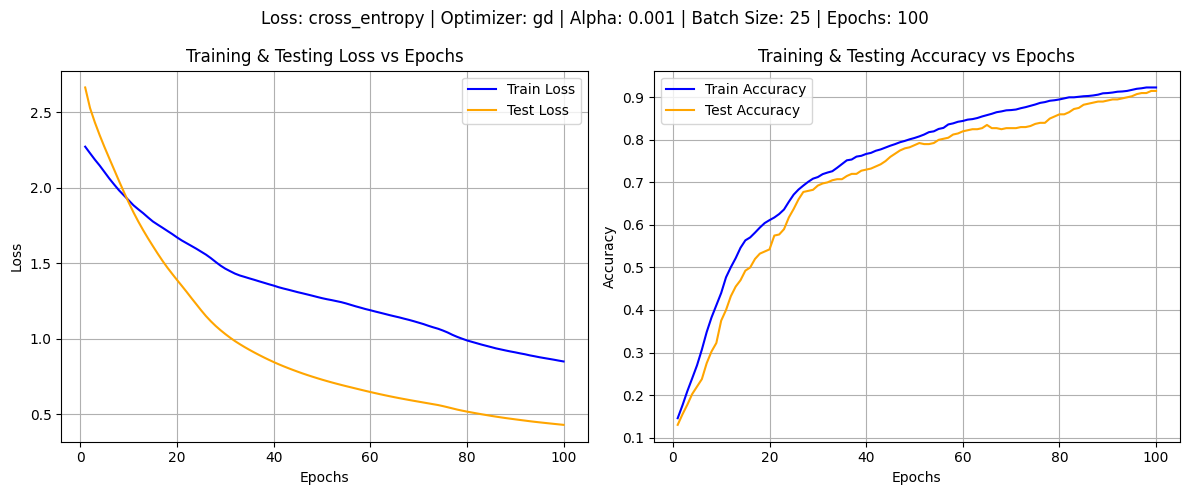

In [6]:
def visualization(history, title):
    #filtered_info = {k: v for k, v in info.items() if v != 0.0}
    

    epochs = np.linspace(1,info["Epochs"], info['Epochs'])

    # Create figure and subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title)
    # Left subplot: Loss vs Epochs
    axes[0].plot(epochs, history['loss_train'], label="Train Loss", color="blue")
    axes[0].plot(epochs, history['loss_test'], label="Test Loss", color="orange")#, linestyle="dashed")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].set_title("Training & Testing Loss vs Epochs")
    axes[0].legend()
    axes[0].grid(True)

    # Right subplot: Accuracy vs Epochs
    axes[1].plot(epochs, history['accuracy_train'], label="Train Accuracy", color="blue")
    axes[1].plot(epochs, history['accuracy_test'], label="Test Accuracy", color="orange")#, linestyle="dashed")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy")
    axes[1].set_title("Training & Testing Accuracy vs Epochs")
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()


info = {'Loss': loss, 'Lasso': loss_params['lambda_lasso'], 'Ridge': loss_params['lambda_ridge'], 'Optimizer' : optimizer, 'Alpha': optimizer_params['alpha'], 'Batch Size': 25, 'Epochs': 100}


visualization(history, info)


In [ ]:
def visualization_1(historys, variable = 'Batch Size'):
    
    
    print(f'data lable shape: {data_labels.shape}')itle)
    # Left subplot: Loss vs Epochs
    for i in range(N):
        axes[0].plot(epochs, historys[i]['loss_train'], label=f"Train Loss | {historys[i]['Batch Size']}")
        axes[0].plot(epochs, historys[i]['loss_test'], label=f"Test Loss | {historys[i]['Batch Size']}")#, linestyle="dashed")
    
    
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].set_title("Training & Testing Loss vs Epochs")
    axes[0].legend()
    axes[0].grid(True)

    # Right subplot: Accuracy vs Epochs
    for i in range(N):
        axes[1].plot(epochs, historys[i]['loss_train'], label=f"Train Loss | {historys[i]['Batch Size']}")
        axes[1].plot(epochs, historys[i]['loss_test'], label=f"Test Loss | {historys[i]['Batch Size']}")#, linestyle="dashed")
    axes[1].plot(epochs, history['accuracy_train'], label="Train Accuracy", color="blue")
    axes[1].plot(epochs, history['accuracy_test'], label="Test Accuracy", color="orange")#, linestyle="dashed")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy")
    axes[1].set_title("Training & Testing Accuracy vs Epochs")
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout
    plt.tight_layout()
    plt.show()


info = {'Loss': loss, 'Lasso': loss_params['lambda_lasso'], 'Ridge': loss_params['lambda_ridge'], 'Optimizer' : optimizer, 'Alpha': optimizer_params['alpha'], 'Batch Size': 25, 'Epochs': 100}



In [4]:
#initizlize the classification training class
hidden_architecture = [10, 50, 10]

loss = 'cross_entropy' 
optimizer = 'adam' 

search_params = {'alpha':[0.001],'lasso':[0, 0.001],'ridge':[0.01] , 'batch':[128, 256]} 


model = Classifier(data, data_labels, hidden_architecture)
model.data_prep(test_split_coef = 0.8, standardization = True) #if validiation coeff is zero, then no hyperparam tuning
best_optimization_params, best_loss_params, best_batch_size = model.hyperparameter_search(5, loss, optimizer, search_params, epochs = 200)

[240, 10, 50, 10, 10]

Testing con: alpha=0.001, Lasso=0, Ridge=0.01, batch_size=128
Epoch 0 -> loss: 4.025148391723633
Epoch 1 -> loss: 3.767186164855957
Epoch 2 -> loss: 3.5242385864257812
Epoch 3 -> loss: 3.276900291442871
Epoch 4 -> loss: 3.047968864440918
Epoch 5 -> loss: 2.841764211654663
Epoch 6 -> loss: 2.5941057205200195
Epoch 7 -> loss: 2.3796000480651855
Epoch 8 -> loss: 2.2041373252868652
Epoch 9 -> loss: 2.054145097732544
Epoch 10 -> loss: 1.9264098405838013
Epoch 11 -> loss: 1.8308744430541992
Epoch 12 -> loss: 1.7538727521896362
Epoch 13 -> loss: 1.6897014379501343
Epoch 14 -> loss: 1.6348624229431152
Epoch 15 -> loss: 1.5866551399230957
Epoch 16 -> loss: 1.5409890413284302
Epoch 17 -> loss: 1.497886061668396
Epoch 18 -> loss: 1.4563090801239014
Epoch 19 -> loss: 1.4174749851226807
Epoch 20 -> loss: 1.3806895017623901
Epoch 21 -> loss: 1.3452935218811035
Epoch 22 -> loss: 1.3128613233566284
Epoch 23 -> loss: 1.2813289165496826
Epoch 24 -> loss: 1.2525784969329834
Epoch 2

KeyboardInterrupt: 

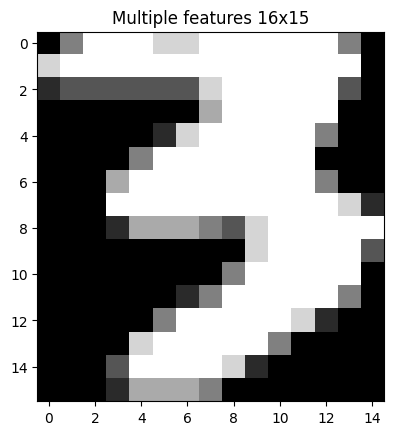

In [5]:

#make a display function from this 
with open("../data/mfeat-pix") as datafile:
    raw_data = datafile.read()

lines = raw_data.split('\n')
data = [line.split() for line in lines]

numbers = [
    int(x)
    for line in data
    for x in line
]

arr =(np.array(numbers).reshape((2000, 16,15)))* 255/6

# Show first data set
plt.imshow(arr[666], cmap="gray")
plt.title("Multiple features 16x15")
plt.show()

In [ ]:

num_classes = 10
samples_per_class = 200
train_samples_per_class = 100
test_samples_per_class = 100

train_data, test_data = preprocessing.split_data(data, num_classes, samples_per_class, train_samples_per_class)


train_labels, test_labels = preprocessing.create_labels(num_classes, train_samples_per_class, test_samples_per_class)



architecture = [train_data.shape[1], 128, 128, 128, 128, 128, 128, num_classes]

print(architecture)
params = neuron_initialization(architecture)

param_trained, history = classification_train(params, cross_entropy_loss, train_data, train_labels, epochs=1000, batch_size = 50)

accuracy(param_trained, test_data, test_labels)

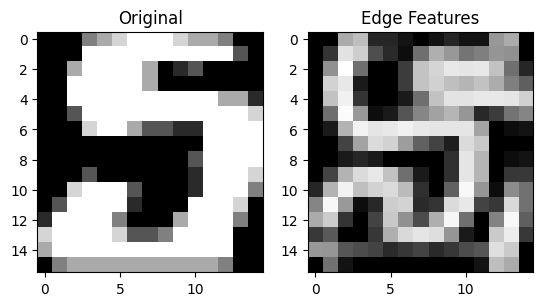

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#make a display function from this 
with open("../data/mfeat-pix") as datafile:
    raw_data = datafile.read()

lines = raw_data.split('\n')
data = [line.split() for line in lines]

numbers = [
    int(x)
    for line in data
    for x in line
]

arr =(np.array(numbers).reshape((2000, 16,15)))* 255/6

# Load grayscale image
image = arr[1000]

# Define Sobel filter for edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
edges = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Show original and edge-filtered image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Features")

plt.show()